In [1]:
""" Kora S. Hughes - Machine Learning Final Project - Fall 2022 """

' Kora S. Hughes - Machine Learning Final Project - Fall 2022 '

In [2]:
# General
from matplotlib import pyplot as plt
import os
import numpy as np

In [3]:
# MediaPipe SetUp --> https://google.github.io/mediapipe/getting_started/python.html
"""
python3 -m venv mp_env && source mp_env/bin/activate
pip install mediapipe
python3
"""
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh
# deactivate

In [5]:
# MediaPipe Implementation --> https://google.github.io/mediapipe/getting_started/python.html
import cv2
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# mediapipe for static images:
def run_mediapipe(IMAGE_FILES, max_hands=1, conf=0.5):
    with mp_hands.Hands(static_image_mode=True, max_num_hands=max_hands, min_detection_confidence=conf) as hands:
        all_results = []
        for idx, file in enumerate(IMAGE_FILES):
            # Read an image, flip it around y-axis for correct handedness output (see above).
            image = cv2.imread(file)  # cv2.flip(cv2.imread(file), 1) not needed since it is already flipped when taken by my method
            # Convert the BGR image to RGB before processing.
            results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            # Draw hand world landmarks.
            if not results.multi_hand_world_landmarks:
                continue
            for hand_world_landmarks in results.multi_hand_world_landmarks:
                mp_drawing.plot_landmarks(hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)
            
            # Print handedness and draw hand landmarks on the image.
#             print('Handedness:', results.multi_handedness)
            if not results.multi_hand_landmarks:
                continue

            # print landmarks
            image_height, image_width, _ = image.shape
            annotated_image = image.copy()
#             for hand_landmarks in results.multi_hand_landmarks:  # normalized
#                 print('hand_landmarks:', hand_landmarks)
#                 print(f'Index finger tip coordinates: (',
#                   f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
#                   f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})')
#                 mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
#                                           mp_drawing_styles.get_default_hand_landmarks_style(),
#                                           mp_drawing_styles.get_default_hand_connections_style())
#             cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
            # save results
            all_results.append(results)
        return all_results

In [ ]:
# calculate landmarks and develop feature matrix from 
key = {"A":0, "B":1, "K":2, "H":3, "Y":4, "W":5}
num_features = 20*3 + len(key)  # 20 landmarks, each with an xyz coord + encoded y
def encode_y(y):
    y_vect = np.zeros((len(y), len(key)))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

In [6]:
image_dir = "/test-images/"  # "/prelim-test-images/"

# get images
cwd = os.getcwd()  # current dir

# list of images via dir string
print("Finding Files...\n")
images = [cwd+image_dir+file for file in os.listdir(cwd+image_dir) if ".png" in file]
assert len(images) >= 1
print("Found", len(images), "files...")

Finding Files...

Found 53 files...


Calculating Landmarks...



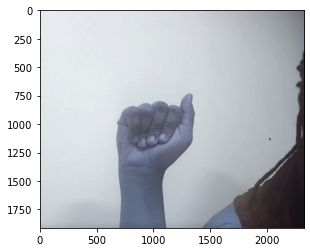

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


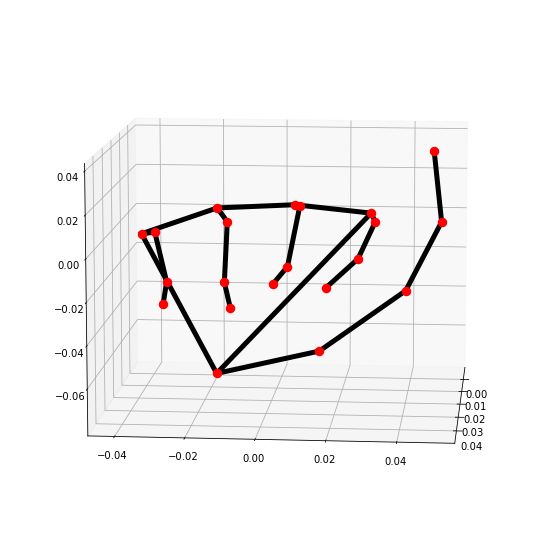

Image is category A which is mapped to 1





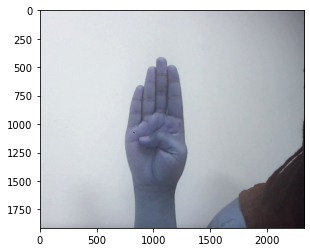

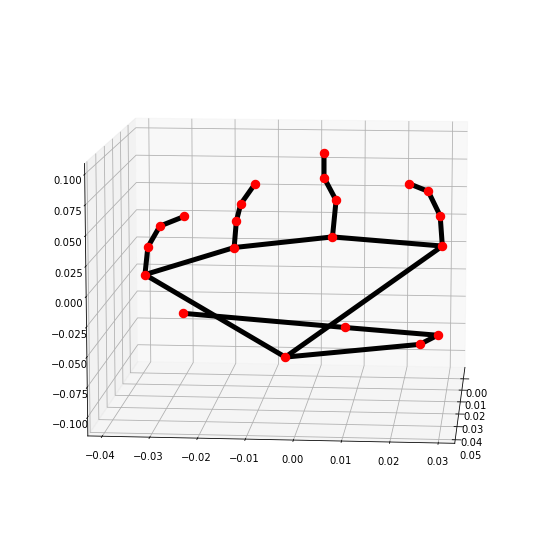

Image is category B which is mapped to 0





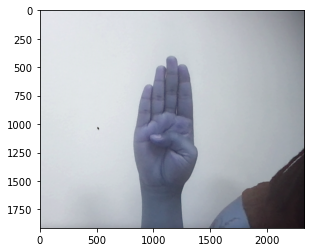

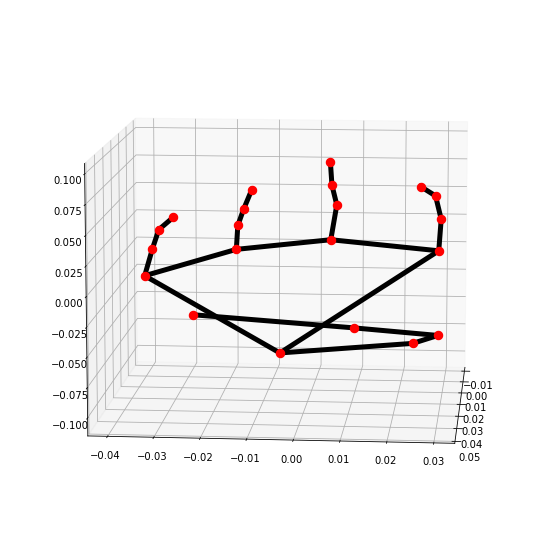

Image is category B which is mapped to 0





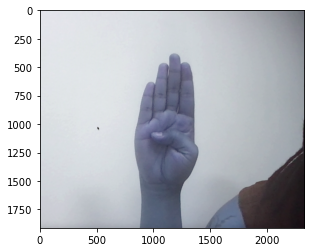

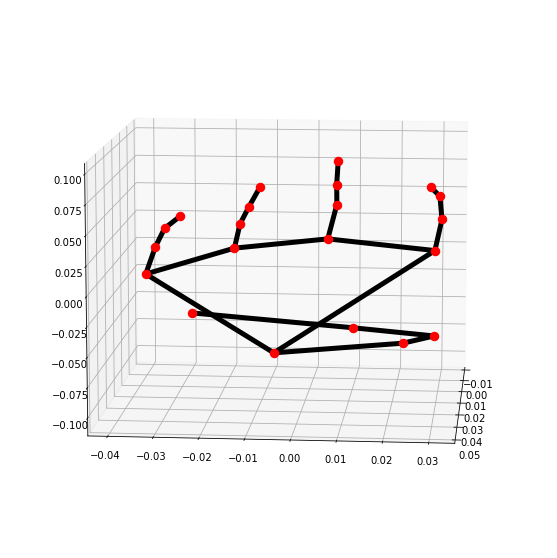

Image is category B which is mapped to 0





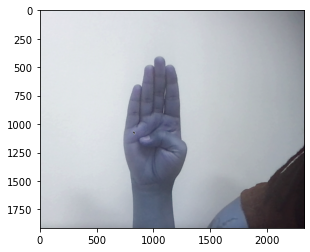

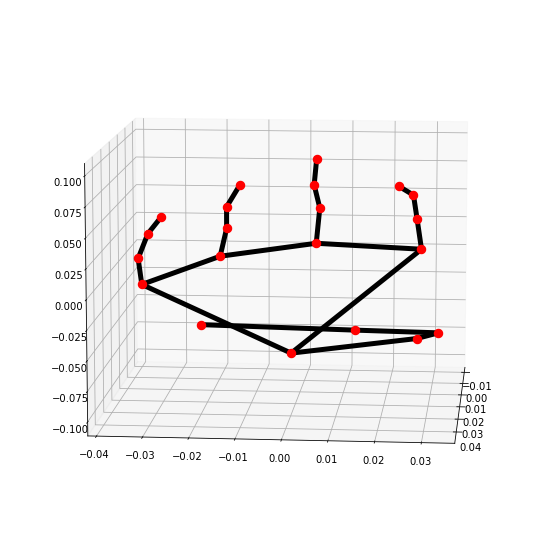

Image is category B which is mapped to 0





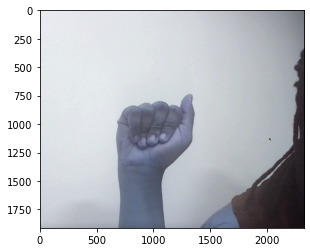

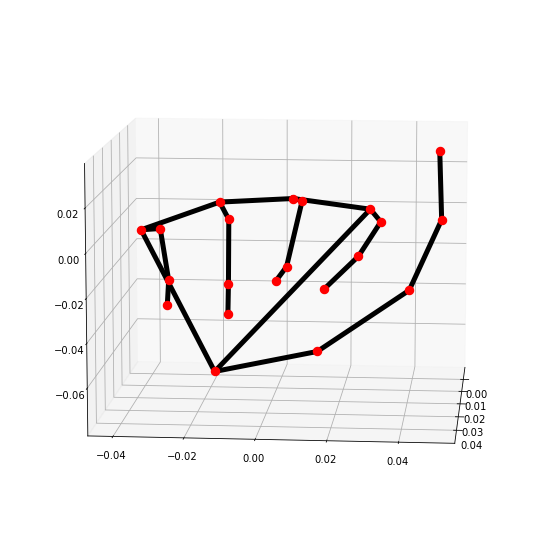

Image is category A which is mapped to 1





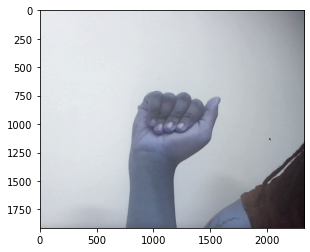

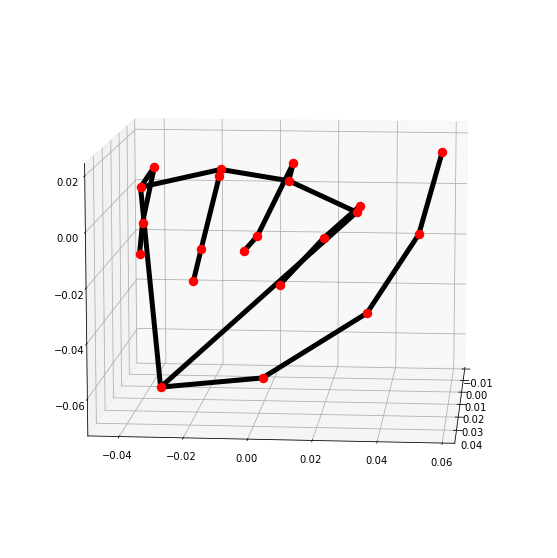

Image is category A which is mapped to 1





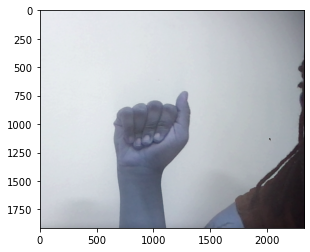

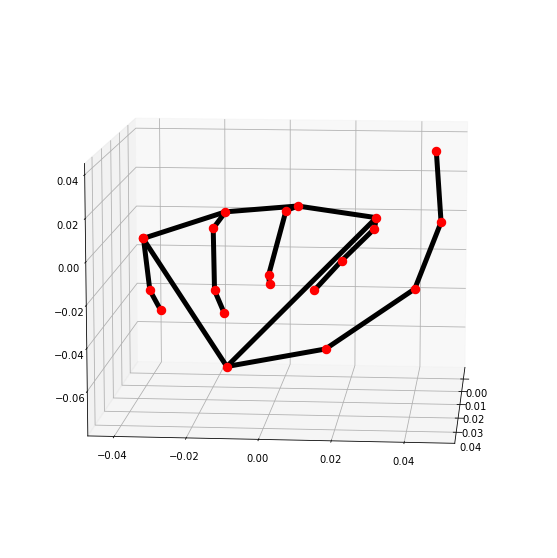

Image is category A which is mapped to 1





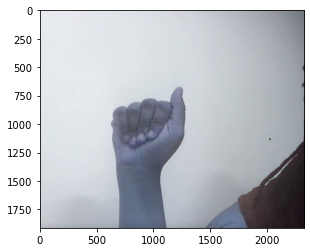

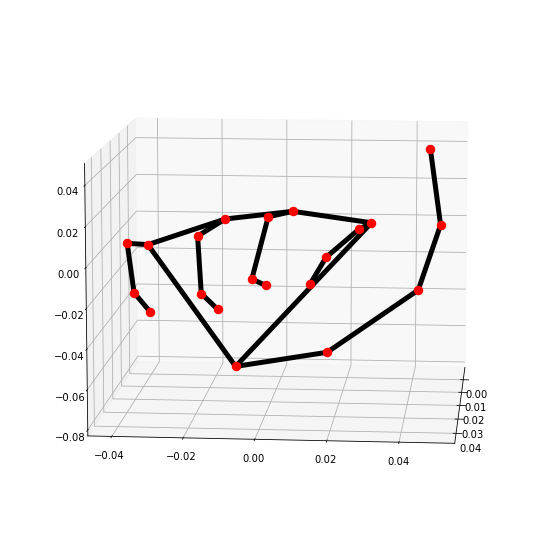

Image is category A which is mapped to 1





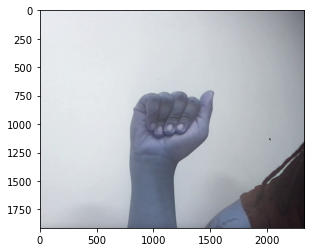

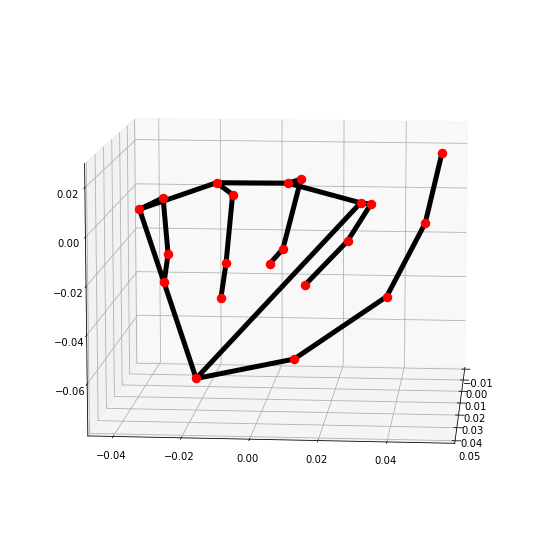

Image is category A which is mapped to 1





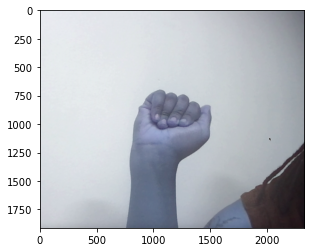

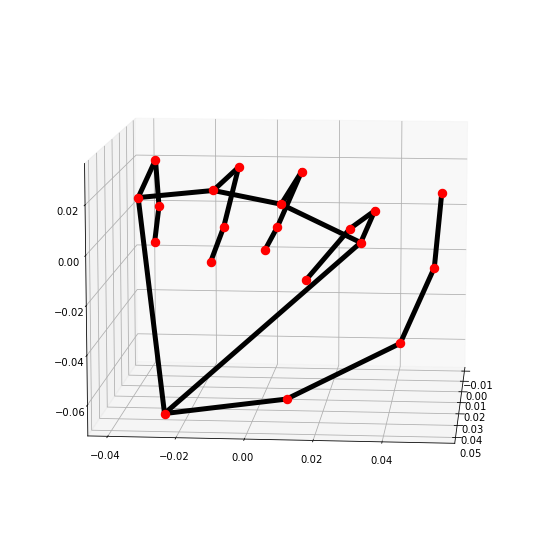

Image is category A which is mapped to 1





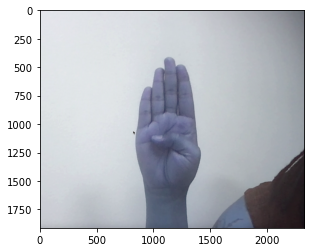

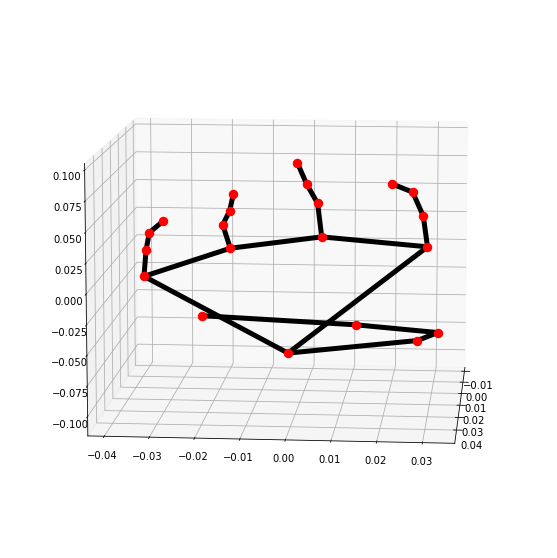

Image is category B which is mapped to 0





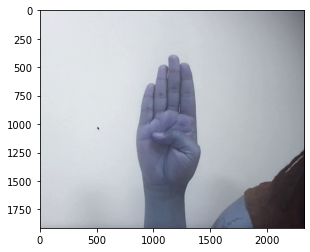

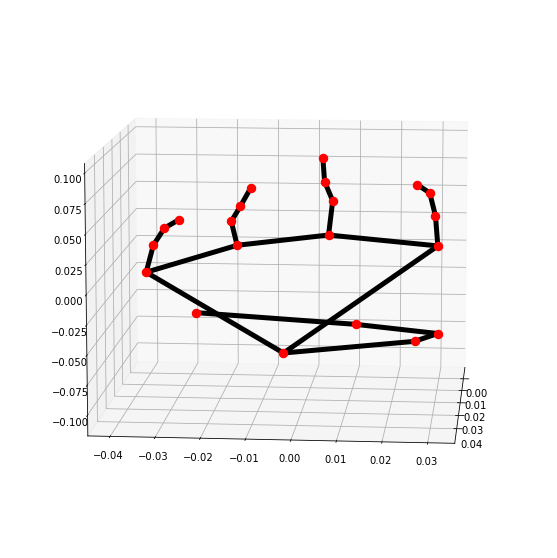

Image is category B which is mapped to 0





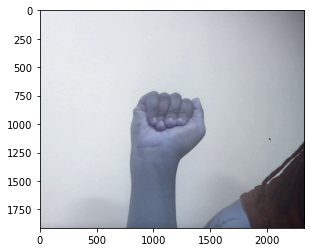

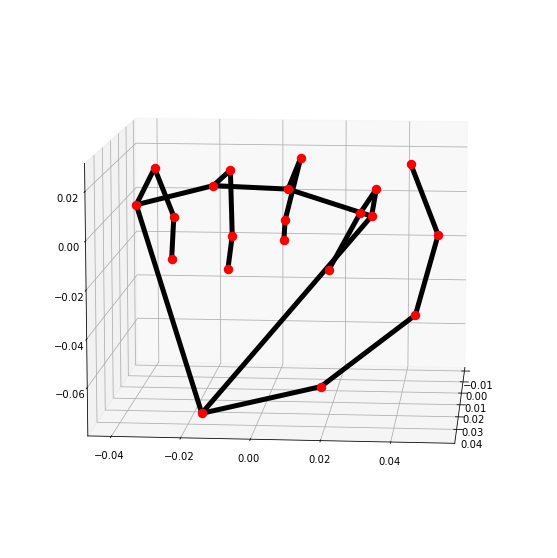

Image is category A which is mapped to 1





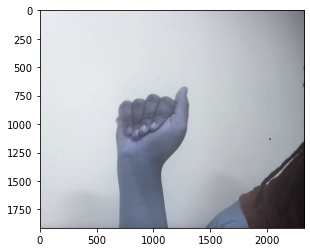

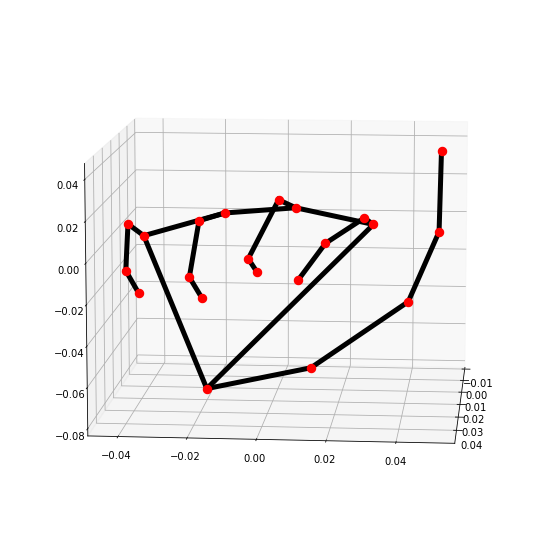

Image is category A which is mapped to 1





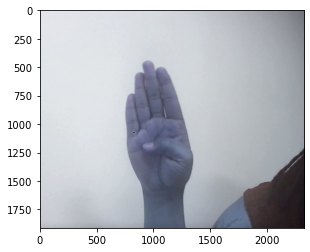

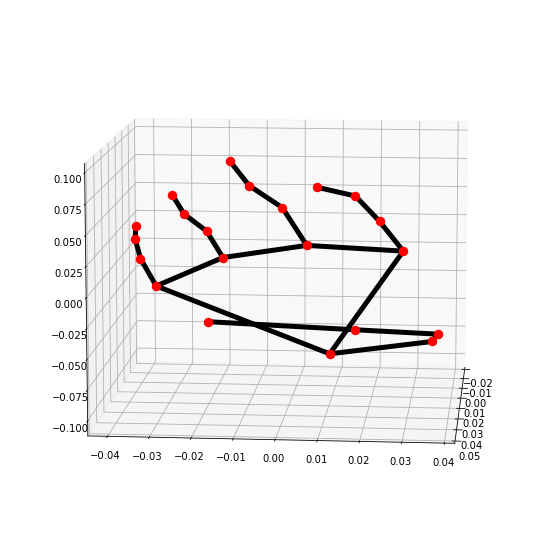

Image is category B which is mapped to 0





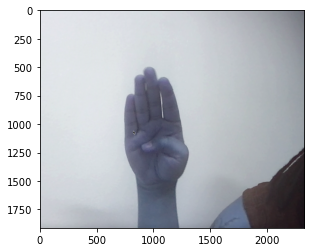

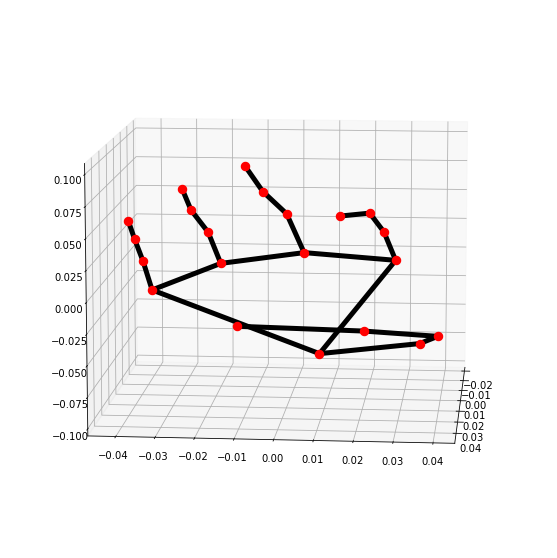

Image is category B which is mapped to 0





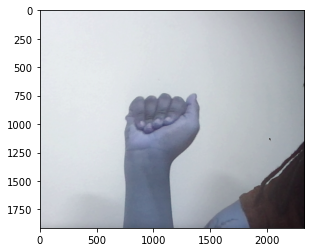

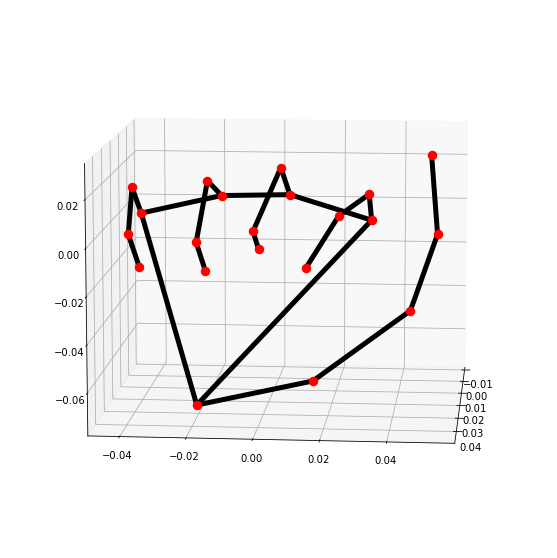

Image is category A which is mapped to 1





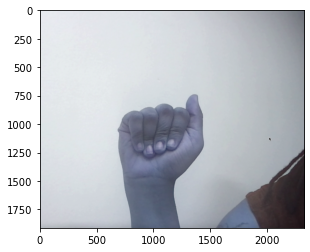

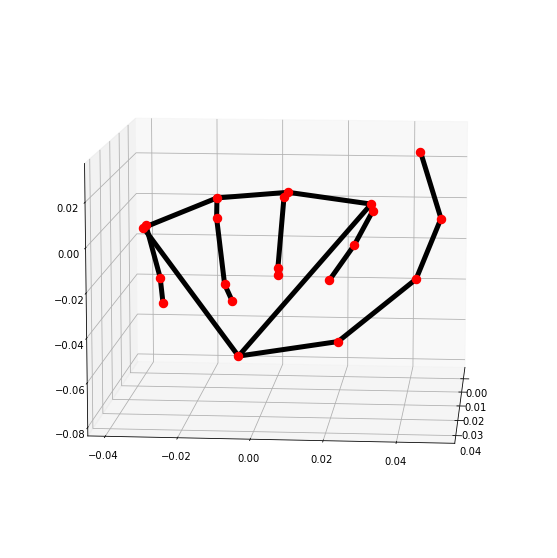

Image is category A which is mapped to 1





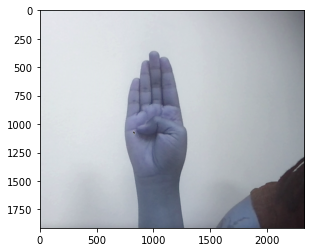

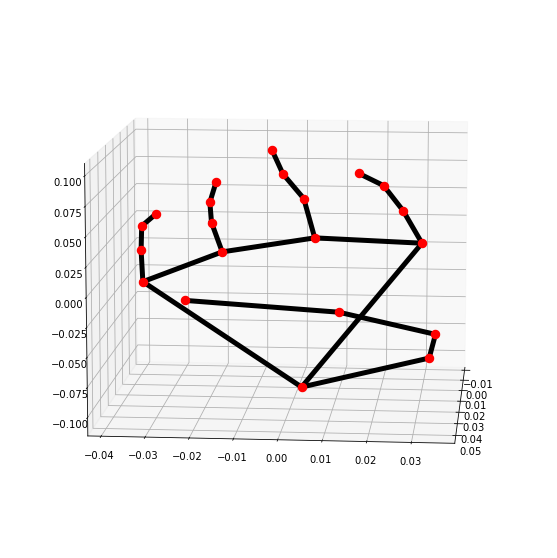

Image is category B which is mapped to 0





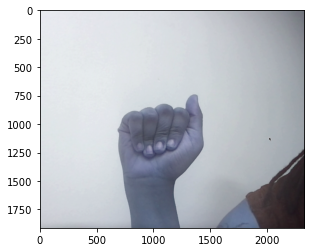

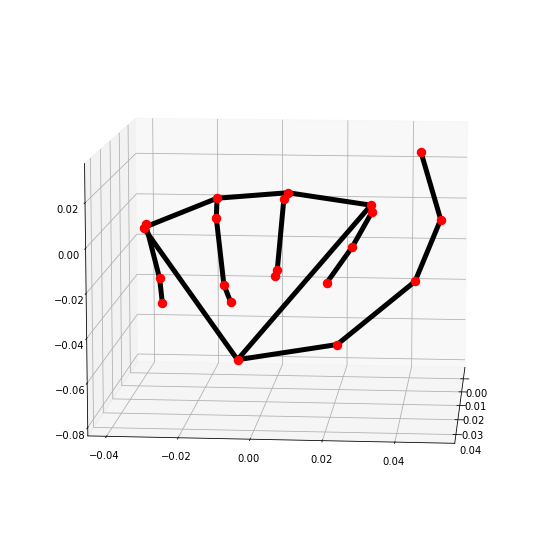

Image is category A which is mapped to 1





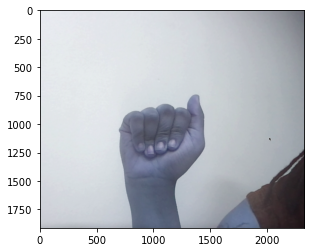

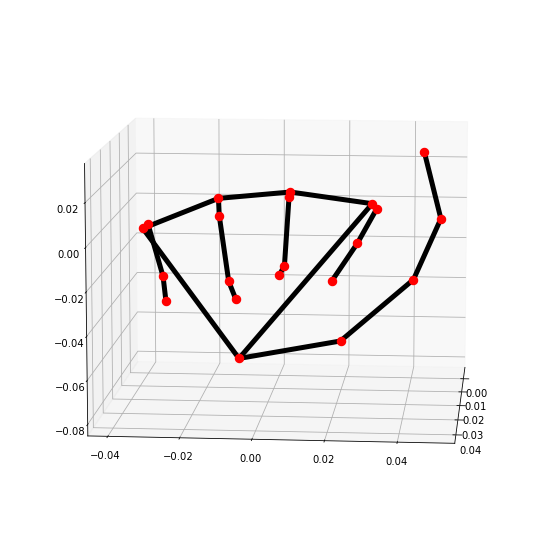

Image is category A which is mapped to 1





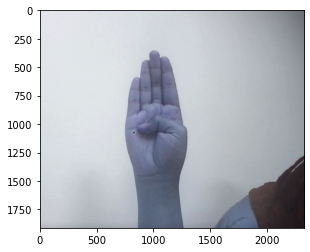

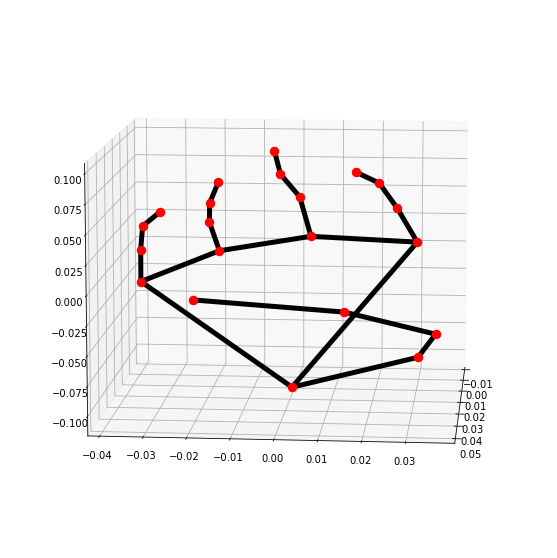

Image is category B which is mapped to 0





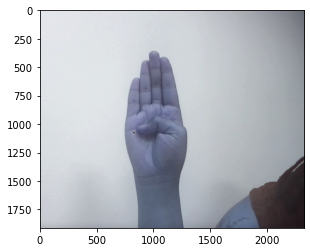

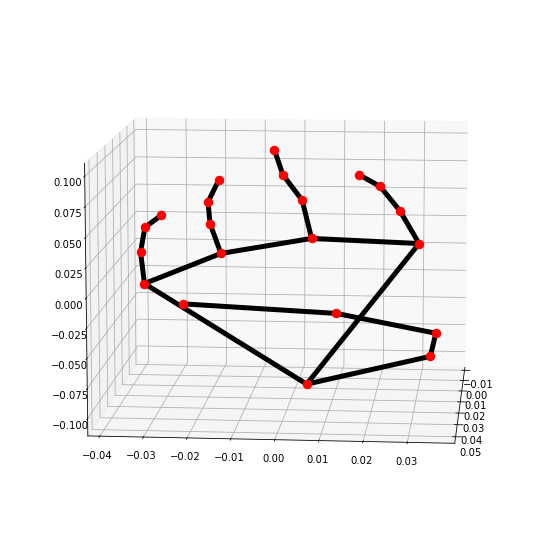

Image is category B which is mapped to 0





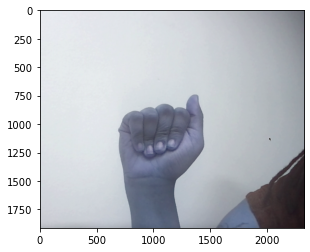

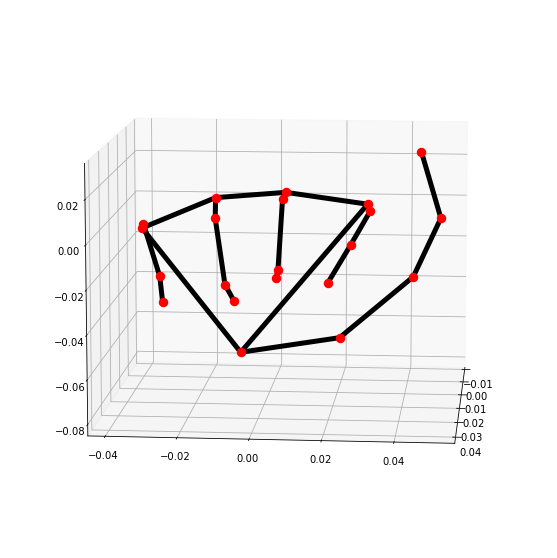

Image is category A which is mapped to 1





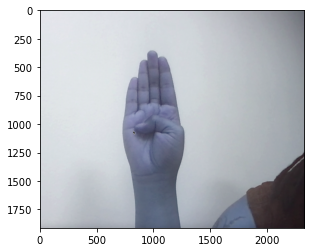

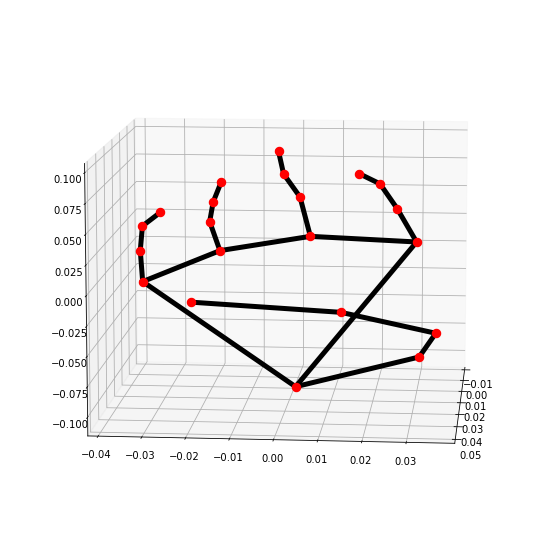

Image is category B which is mapped to 0





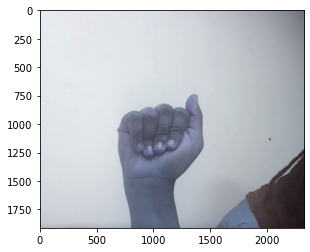

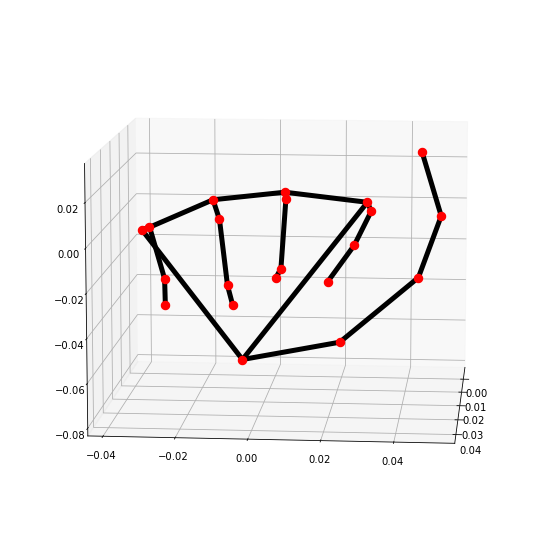

Image is category A which is mapped to 1





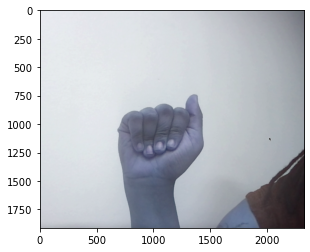

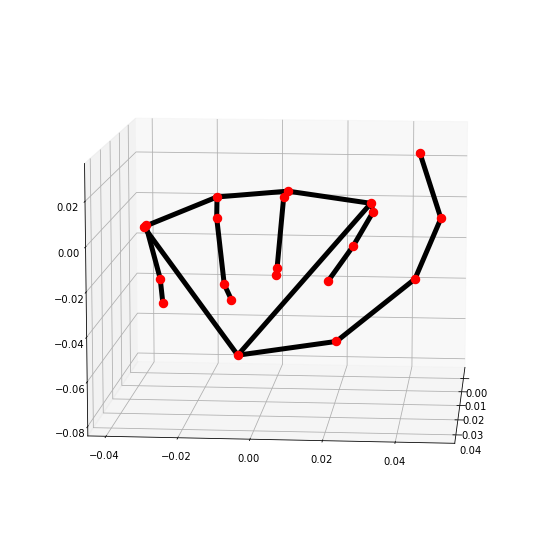

Image is category A which is mapped to 1





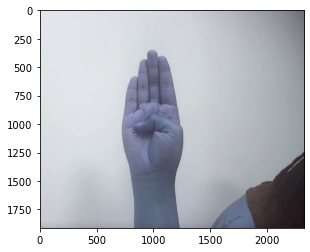

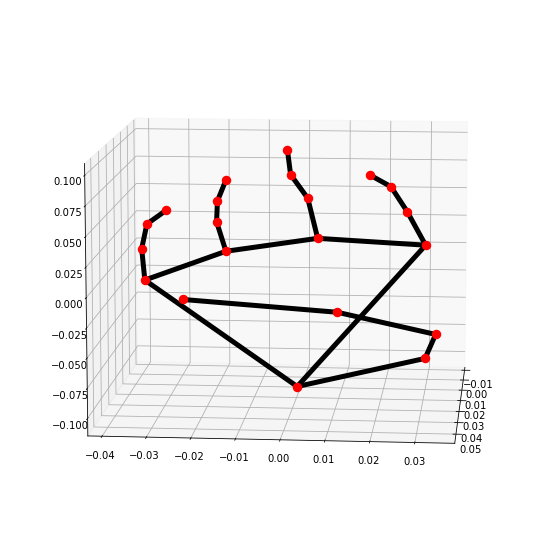

Image is category B which is mapped to 0





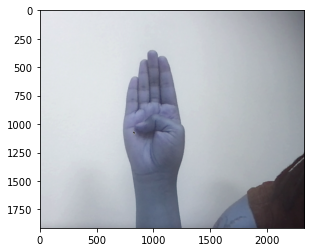

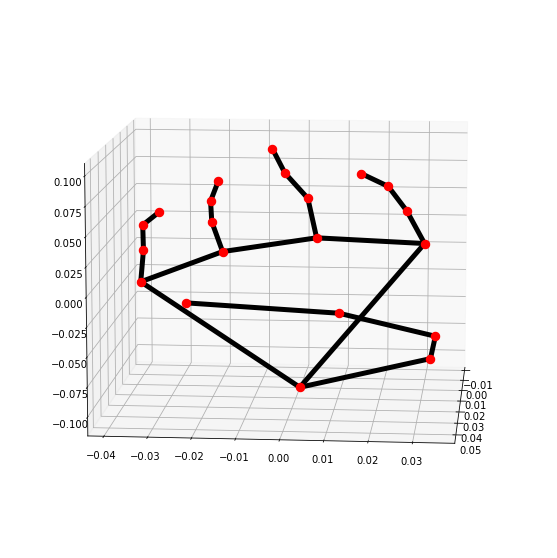

Image is category B which is mapped to 0





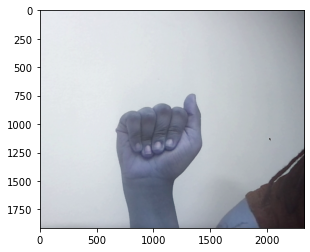

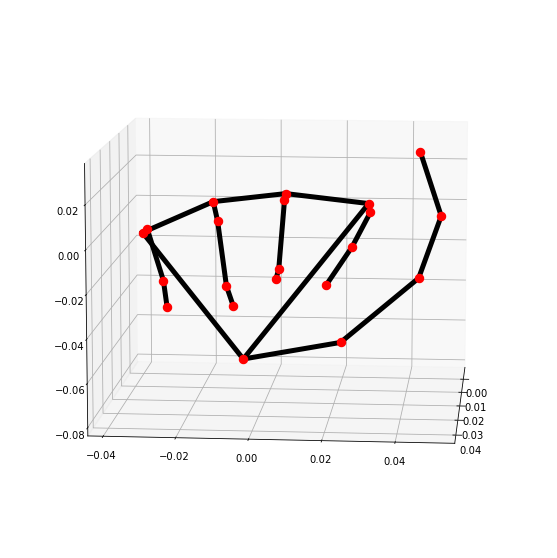

Image is category A which is mapped to 1





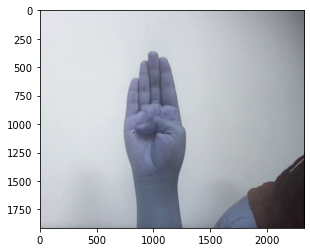

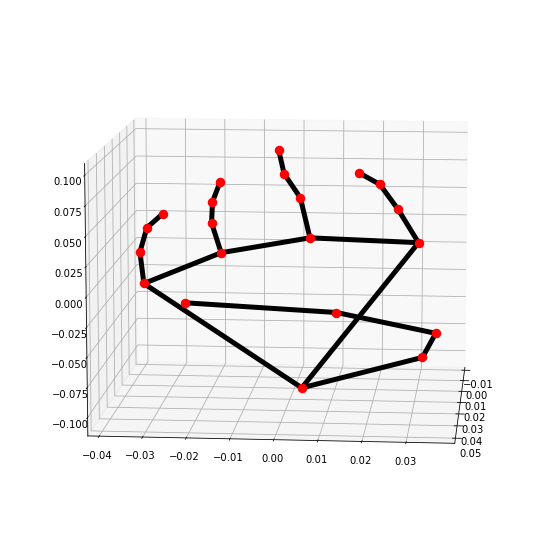

Image is category B which is mapped to 0





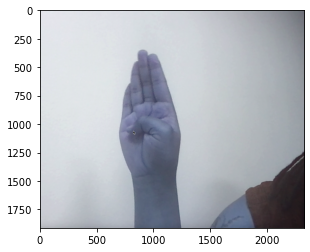

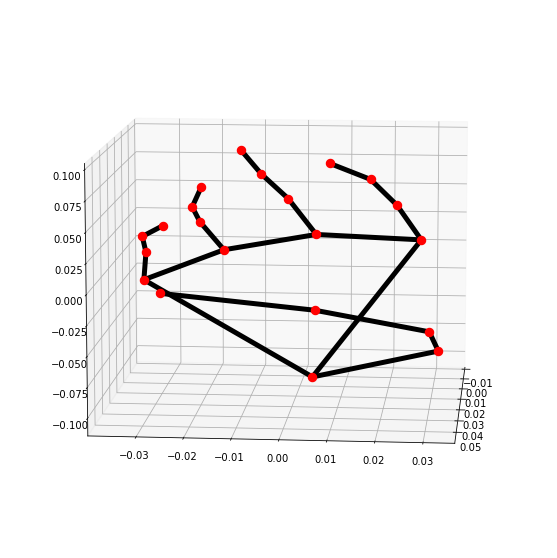

Image is category B which is mapped to 0





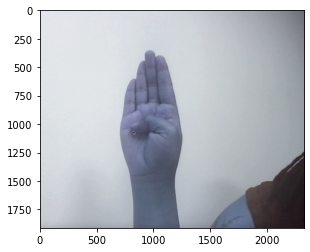

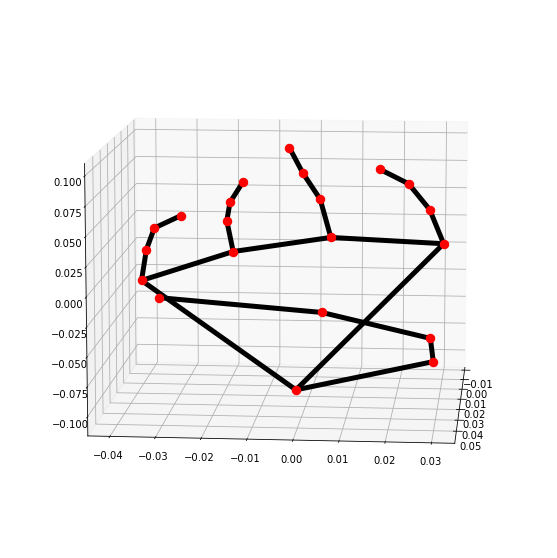

Image is category B which is mapped to 0





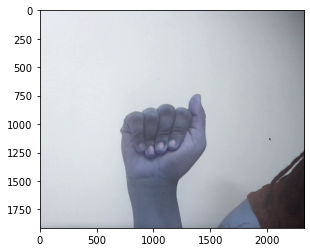

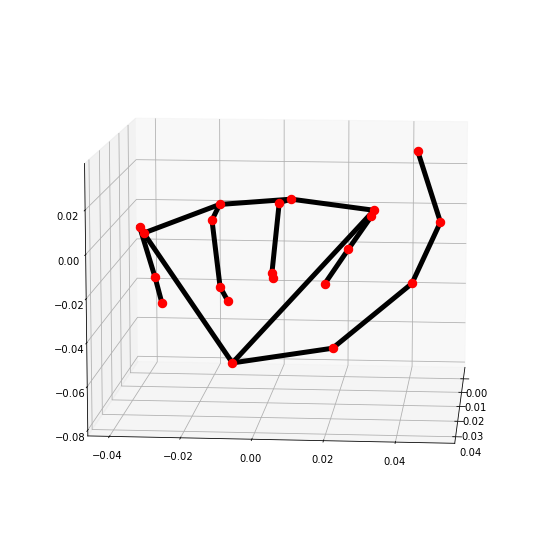

Image is category A which is mapped to 1





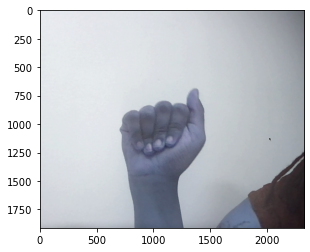

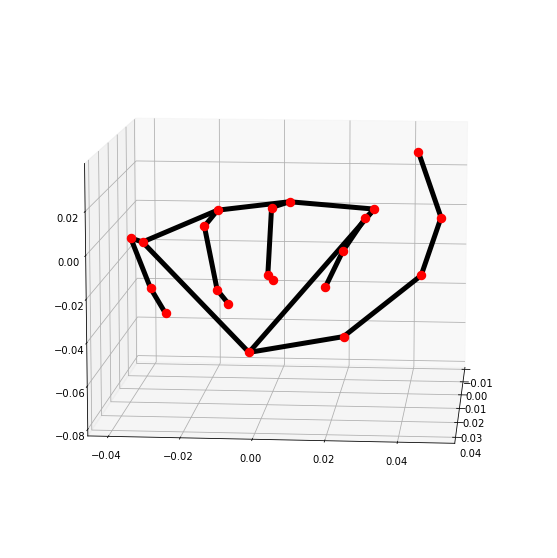

Image is category A which is mapped to 1





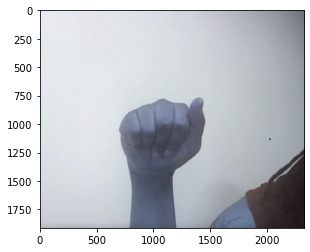

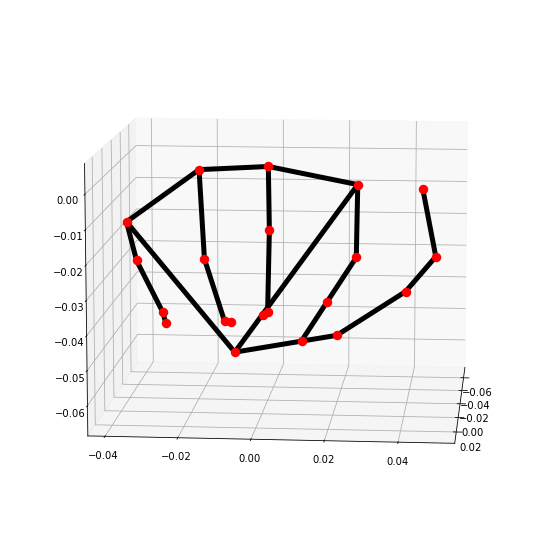

Image is category A which is mapped to 1





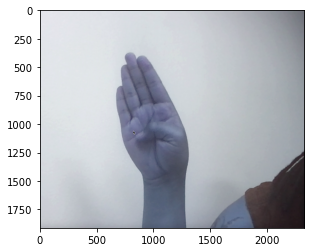

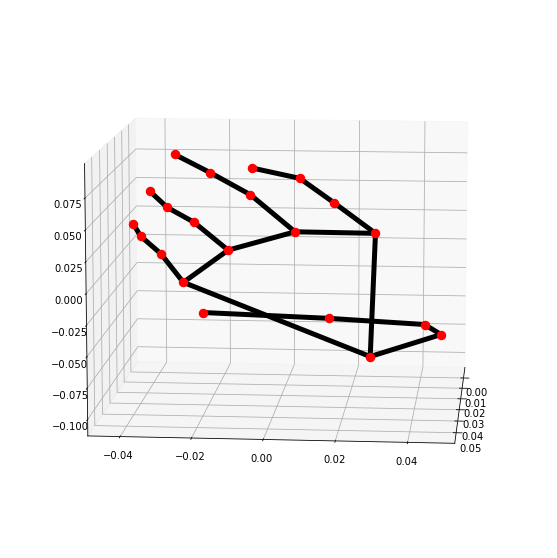

Image is category B which is mapped to 0





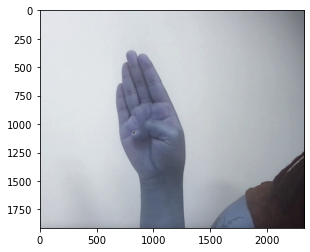

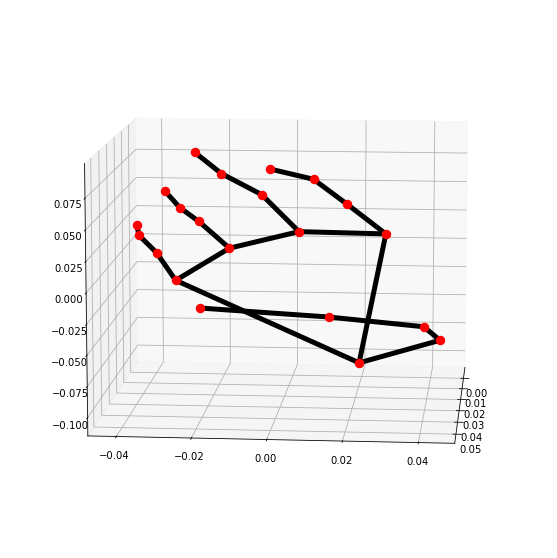

Image is category B which is mapped to 0





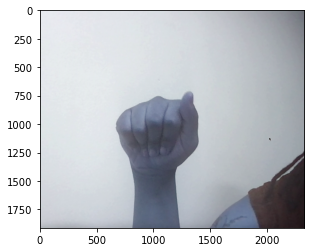

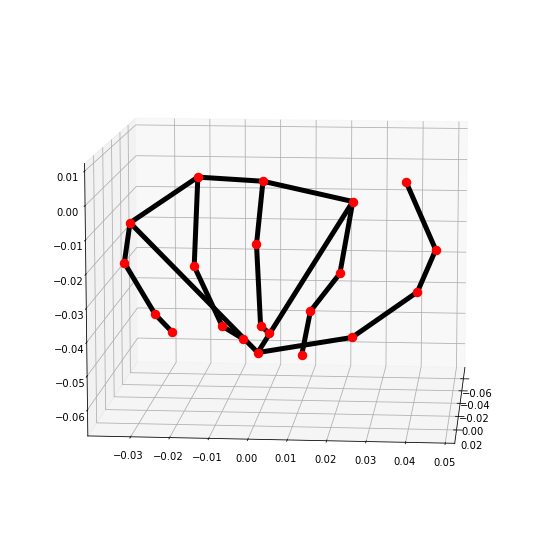

Image is category A which is mapped to 1





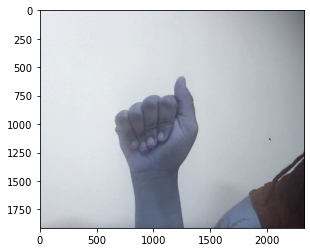

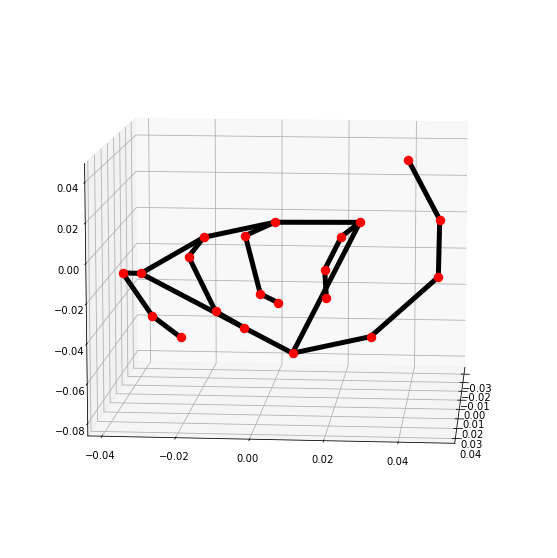

Image is category A which is mapped to 1





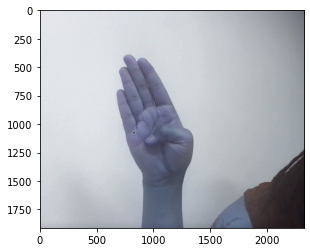

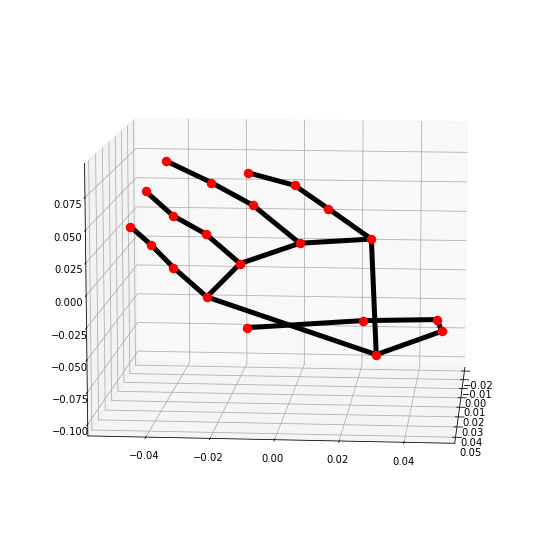

Image is category B which is mapped to 0





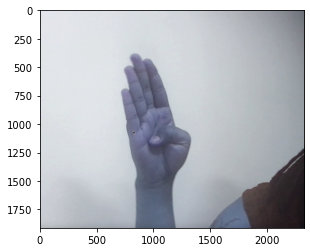

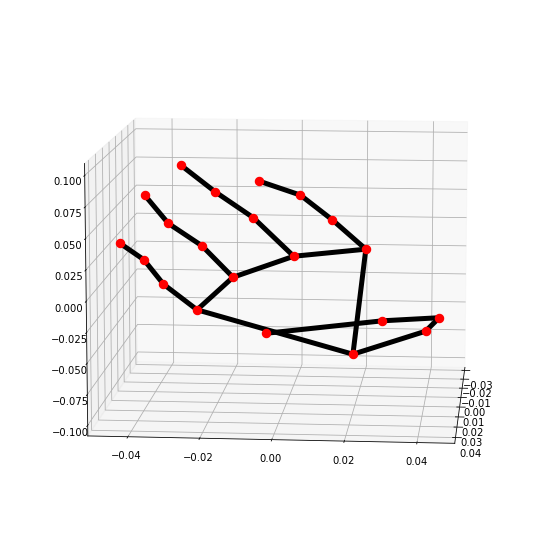

Image is category B which is mapped to 0





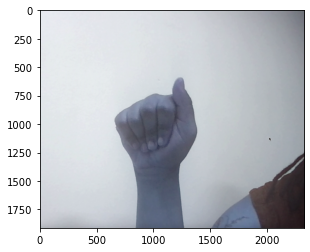

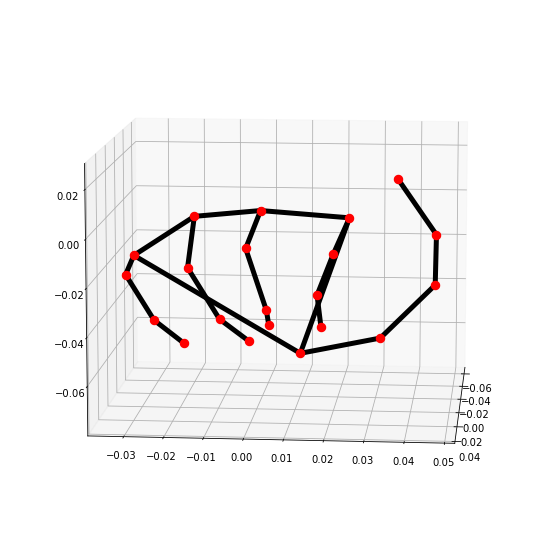

Image is category A which is mapped to 1





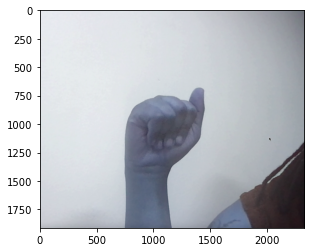

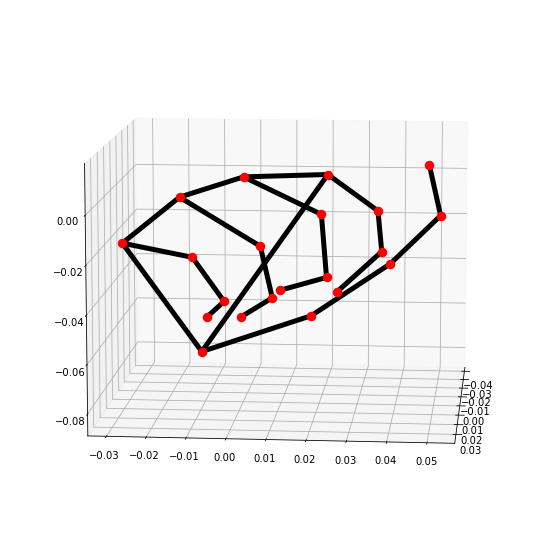

Image is category A which is mapped to 1





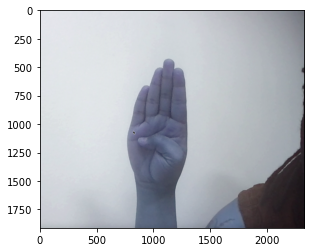

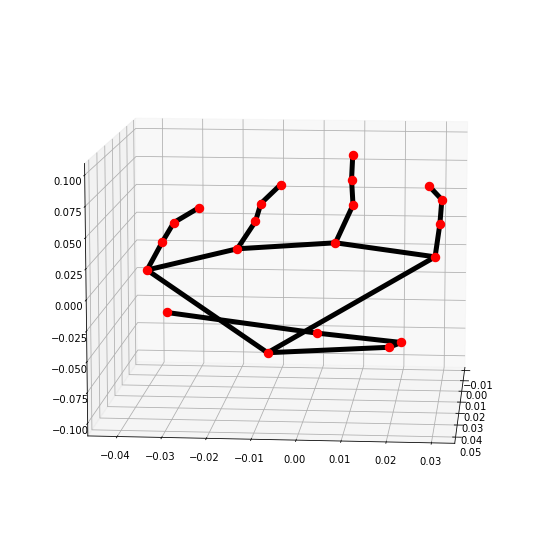

Image is category B which is mapped to 0





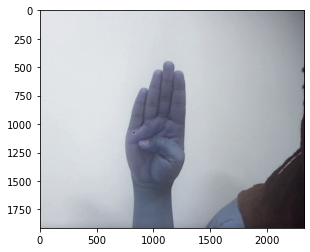

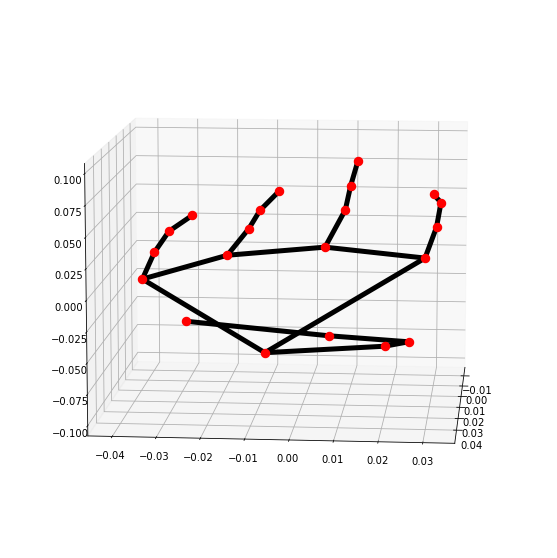

Image is category B which is mapped to 0





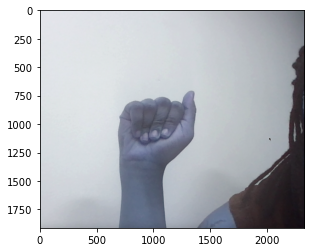

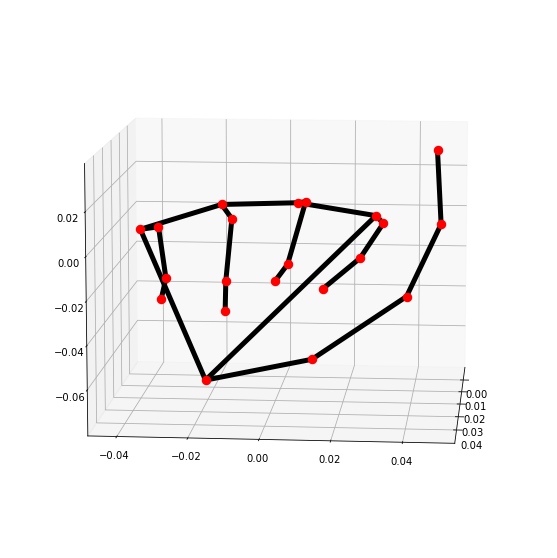

Image is category A which is mapped to 1





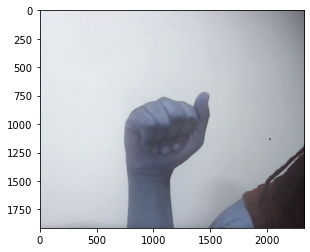

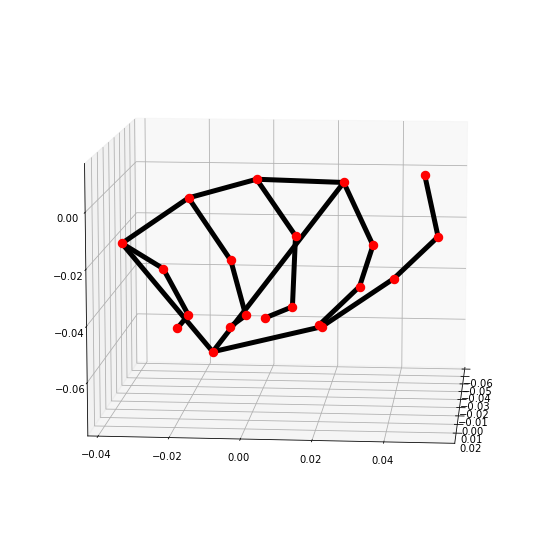

Image is category A which is mapped to 1





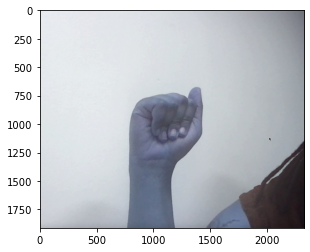

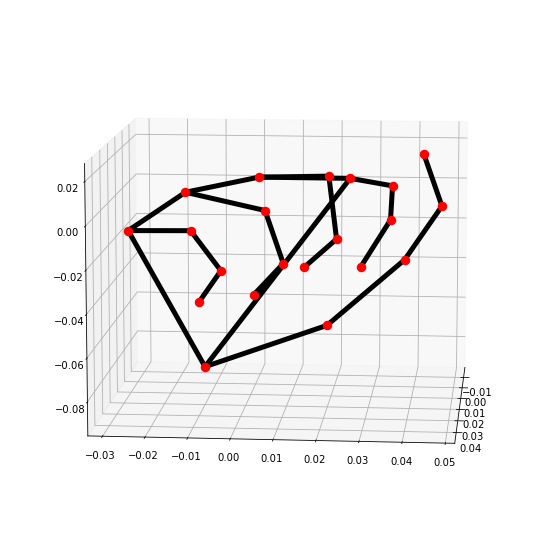

Image is category A which is mapped to 1





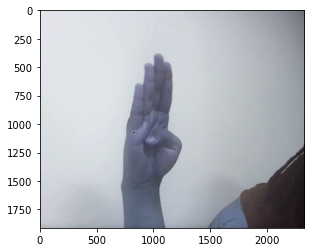

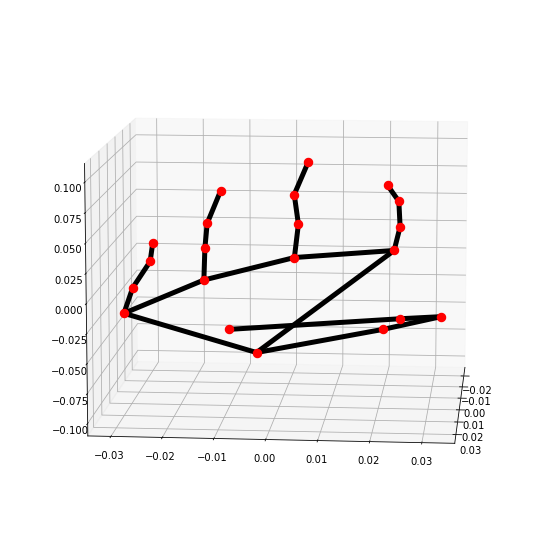

Image is category B which is mapped to 0





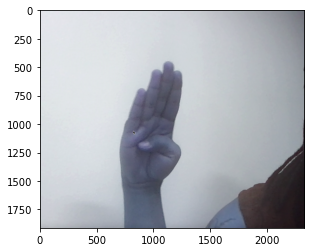

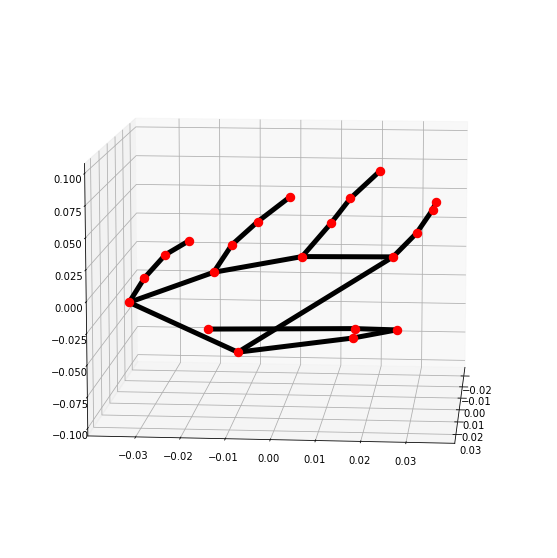

Image is category B which is mapped to 0





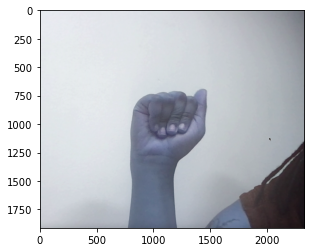

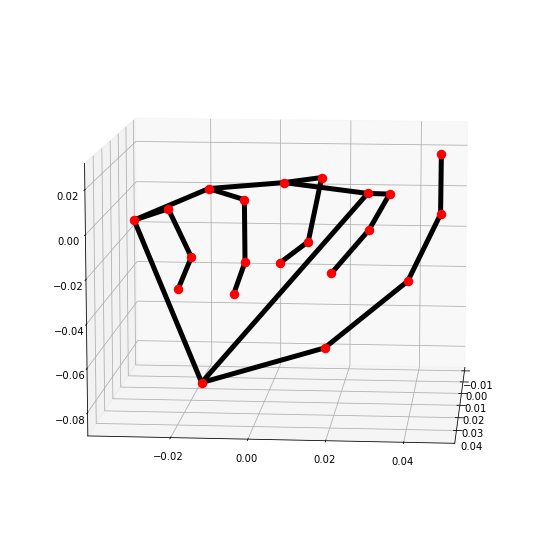

Image is category A which is mapped to 1



Feature Matrix X (53, 64) :
 [[ 1.          0.38389274  0.72419727 ...  0.36085057  0.59071827
  -0.02190853]
 [ 1.          0.43125582  0.79943895 ...  0.38155356  0.36111832
  -0.05740339]
 [ 1.          0.46029842  0.7923649  ...  0.41149586  0.36590567
  -0.06586176]
 ...
 [ 1.          0.42022353  0.76565492 ...  0.37794447  0.36241701
  -0.10560419]
 [ 1.          0.40141827  0.79298955 ...  0.38707757  0.38767594
  -0.10858055]
 [ 1.          0.44014302  0.68636632 ...  0.43391579  0.53648221
  -0.01388153]]
y: [[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]]



In [7]:
results = np.ones((1, num_features+2))
#     print("Key:", [val for val in mp_hands.HandLandmark])  # ref: https://google.github.io/mediapipe/solutions/hands.html#static_image_mode
print("Calculating Landmarks...\n")
for img in images:
    plt.imshow(cv2.imread(img))  # show actual image
    plt.show()
    
    ret = run_mediapipe([img], 1)[0].multi_hand_landmarks[0]  # get hand skeleton data
#     print("Return:", ret.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP])

    # translate landmark values to feature matrix format
    add_row = np.ones((1, num_features+2))
    for j in range(1, num_features, 3):
        add_row[0, j] = ret.landmark[j//3].x
        add_row[0, j+1] = ret.landmark[j//3].y
        add_row[0, j+2] = ret.landmark[j//3].z
        
    # add target variable (ex: a vs. b = ) --> formatting from data_gatherer file
    # in image address: find the last instance of / and use the character after as the determinant for which letter it is
    letter = img[img.rfind('/')+1]
    assert letter in key.keys()
    add_y = encode_y(letter)  # one-hot encode
    print("Image is category", letter, "which is mapped to", key[letter], "=", add_y)
    
    add_row[0, (num_features+1)] = key[ img[img.rfind('/')+1] ]  
#     print("adding row", add_row)
#     add_row = convert_results(add_row)

    results = np.vstack((results, add_row))  # append results
    print('\n\n')

# clean results
temp = np.delete(results, (0), axis=0)  # delete the initial row of ones
y = temp[:, -1].reshape(-1,1)  # target
X = temp[:, :-1]  # take out target from feature matrix
print("Feature Matrix X", X.shape, ':\n', X)
print("y:", y)
print()

In [13]:
# ml fns
def sigmoid(z):
    result = 1/(1+np.exp(-z))
    return result

def hypothesis(X_train_1, w):
    y_hat = sigmoid(np.dot(X_train_1, w))
    return y_hat


def add_ridge(w, l=0.05, lasso=False):
    if lasso:
        return np.sum(np.absolute(w))*l
    return np.sum(np.square(w))*l

def likelihood(X_tr, y_tr, w, n, r=False):
    y_hat = hypothesis(X_tr, w)
    t1 = np.dot(y_tr.T, np.log(y_hat))
    t2 = np.dot((1-y_tr.T), np.log(1-y_hat))
    likelihood = np.sum(t1 + t2)
    if r:
        likelihood = likelihood - add_ridge(w, 0.05)
    return likelihood


data_div = 20 # num data pts skipped in between plotting pts
def Gradient_Ascent(X_train_1, y_2d_train, learning_rate, num_iters):
    N = len(X_train_1) # Number of training examples.
    likelihood_values = []
    w = np.zeros((X_train_1.shape[1],1))
    
    for i in range(num_iters):
        y_hat = hypothesis(X_train_1, w)
        error = y_2d_train - y_hat
        gradient = np.dot(X_train_1.T, error)  # - add_ridge(w, lambd2)
        w = w + (learning_rate/N)*gradient  # Updating Parameters
        if (i % data_div) == 0:
#             print("added ridge of", add_ridge(w, lambd2))
#             print("new w mean", np.mean(w))
            likelihood_values.append(likelihood(X_train_1,y_2d_train, w*1, N))
    return w, likelihood_values

make_binary = np.vectorize(lambda x, t: 1 if x > t else 0)  # helper
def precision_recall(y_hat, y, threshold):  
    # Before finding precision or recall, you have to convert y_hat into a vector of zeros and ones named y_hat_binary using threshold.
    # Values in y_hat > threshold should be equal to 1 and others should be 0.
    y_hat = np.copy(y_hat)
    # Convert values in y_hat_binary to binary values below
    y_hat_binary = make_binary(y_hat, threshold)

    # Calculate false positive and false negative using false difference
    # HINT: false different can be calculated by subtracting hypothesis from actual value
    # HINT: if done correctly, false_pos should be 4 and false_neg should be 2
    false_difference = y_hat - y
    false_pos = np.sum(np.logical_and(y_hat_binary == 1, y == 0))
    false_neg = np.sum(np.logical_and(y_hat_binary == 0, y == 1))

    all_trues = np.ones((y.shape[0], 1)) 
    # Calculate true positive using all_trues and true difference
    # HINT: true different can be calculated by subtracting sum of hypothesis and actual value from all trues
    # HINT: if done correctly, true_pos should be 266
    true_difference = np.sum(y_hat_binary) - np.sum(y)
    true_pos = np.sum(np.multiply(y_hat_binary, y))  # only = 1 if both y_hat and y are 1
    true_neg = np.sum(np.logical_and(y_hat_binary == 0, y == 0))

    print("[TP, TN, FP, FN] =", [true_pos, true_neg, false_pos, false_neg])
    precision = true_pos/(true_pos+false_pos)
    recall = true_pos/(true_pos+false_neg)
    return precision, recall

def f_score(precision, recall):
    score = (2*precision*recall)/(precision+recall)
    return score

def predict(X_train_1, w):
    y_hat = hypothesis(X_train_1, w)
    return y_hat


Training Results for 2 training examples and Testing classifications...


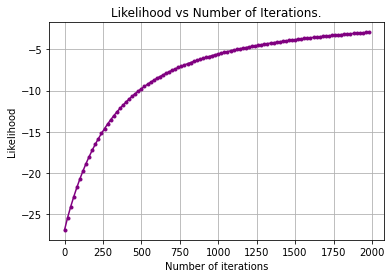

Training Validation with 39 items...
[TP, TN, FP, FN] = [20.0, 19, 0, 0]
Precision:  1.0
Recall:  1.0
F1: 1.0

Testing Validation with 14 items...
[TP, TN, FP, FN] = [8.0, 6, 0, 0]
Precision:  1.0
Recall:  1.0
F1: 1.0



In [16]:
# machine learning part
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

# preprocessing
# print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print()

# train weights for feature matrix
num_iters = 2000
learning_rate = 0.05
w, likelihood_values = Gradient_Ascent(X_train, y_train, learning_rate, num_iters)
# print("W_final:", w)


print("\nTraining Results for", len(X.shape), "training examples and", key, "classifications...")
iters = np.array(range(0,num_iters,data_div))
plt.plot(iters,likelihood_values,'.-',color='purple')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()
plt.show(block=False)


# Validation
validations = {"Training":[X_train, y_train], "Testing":[X_test,y_test]}
for key, value in validations.items():
    print(key, "Validation with", len(value[0]), "items...")
    y_hat = predict(value[0], w)  # predict(X_train, w)
    # print("y-comparison (predicted vs. actual):\n", np.hstack((make_binary(y_hat, 0.5), y_train)))

    precision, recall = precision_recall(y_hat, value[1], 0.5)
    print('Precision: ', precision)
    print('Recall: ', recall)
    fsc = f_score(precision, recall)
    print("F1:", fsc)
    print()
# TODO: find the top 10 most significant measurements according to the weights and translate them to the mp_hands.HandLandmark